In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/prepro_num/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df = df.loc[:, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,221900.0,3,1.00,1180,5650
1,538000.0,3,2.25,2570,7242
2,180000.0,2,1.00,770,10000
3,604000.0,4,3.00,1960,5000
4,510000.0,3,2.00,1680,8080


In [4]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
dtype: int64

In [5]:
#欠損値を削除する場合
#df = df.fillna() #欠損値がある行を全て削除してしまう

#欠損値の数を指定して削除（以下の例の場合、欠損値が３つ続くと削除する）
#df.dropna(thresh=3)



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06


In [8]:
df.corr()#相関係数

,price,bedrooms,bathrooms,sqft_living,sqft_lot
price,1.000000,0.308350,0.525138,0.702035,0.089661
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000


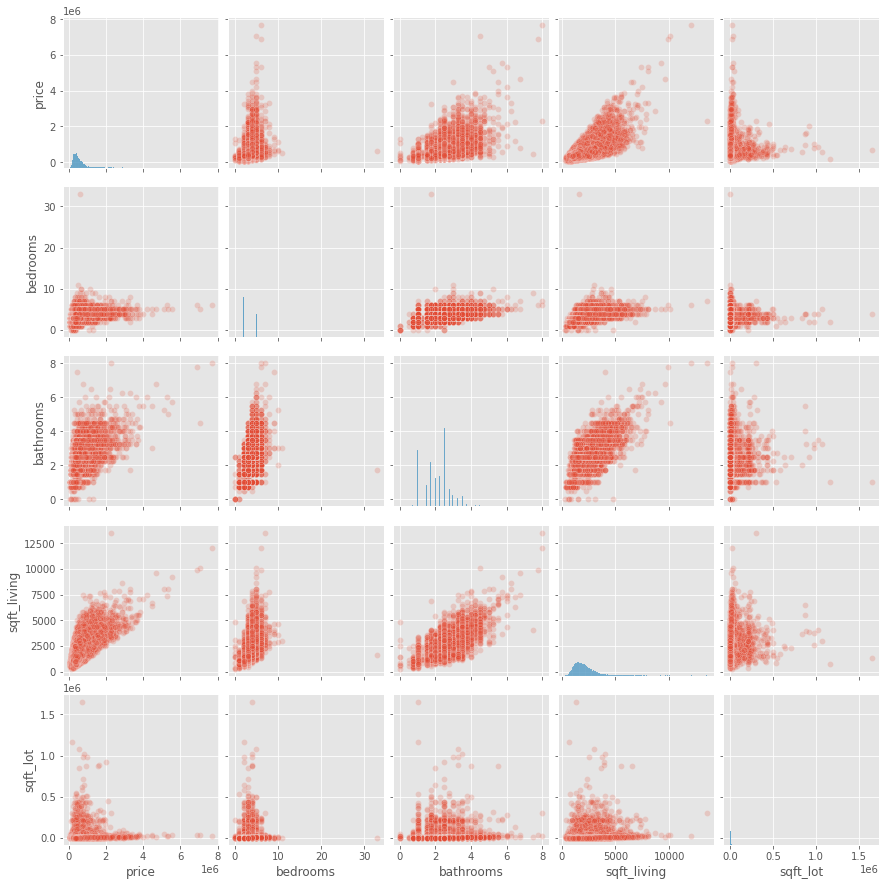

In [9]:
#相関係数を可視化する
sns.pairplot(df, plot_kws={'alpha': 0.2})

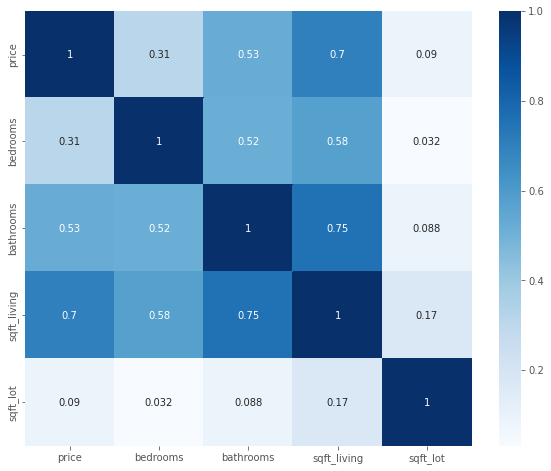

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


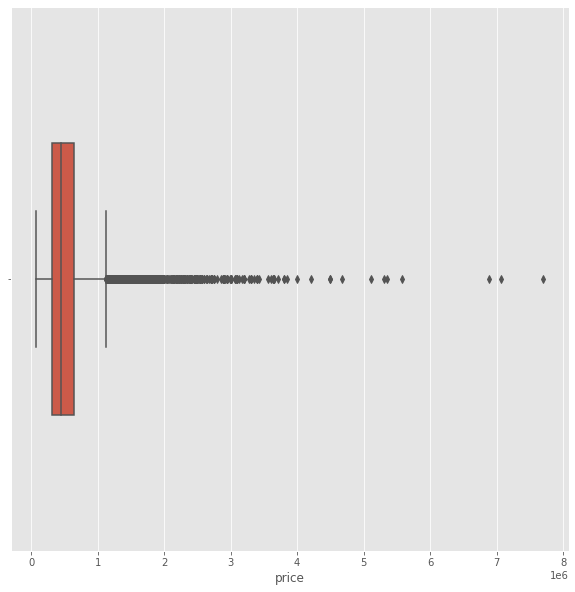

In [11]:
#箱ヒゲ図でデータの散らばりを確認
plt.figure(figsize=(10,10))
sns.boxplot(df['price'], orient= 'v', width=0.5)

In [12]:
#外れ値の処理
#四分位数を使った方法（四分位範囲の1.5倍以上離れたものを削除）
def outlier_iqr(df, columns=None):
  if columns == None:
    columns = df.columns
  
  for col in columns:
    q1 = df[col].describe()['25%']
    q3 = df[col].describe()['75%']
    #四分位範囲
    iqr = q3 - q1

    outlier_min = q1 - iqr * 1.5
    outlier_max = q3 + iqr * 1.5

    #範囲から外れている値を除く
    df = df[(df[col] >= outlier_min & (df[col] <= outlier_max))]
  
  return df

In [36]:
#標準偏差を使った方法

def outlier_std(df, thresh = 3, columns = None):
  if columns == None:
    columns = df.columns
  
  for col in columns:
    mean = df[col].mean()
    std = df[col].std()

    #平均値から標準偏差の何倍離れているか計算
    border = (np.abs(df[col] - mean)) / std

    #標準偏差の3倍以上離れている値を除外
    df = df[(border < thresh)]
  
  return df
  

In [41]:
print("before", df.shape)
#df = outlier_std(df, ['price'])
print("after", df.shape)


before (21613, 5)


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


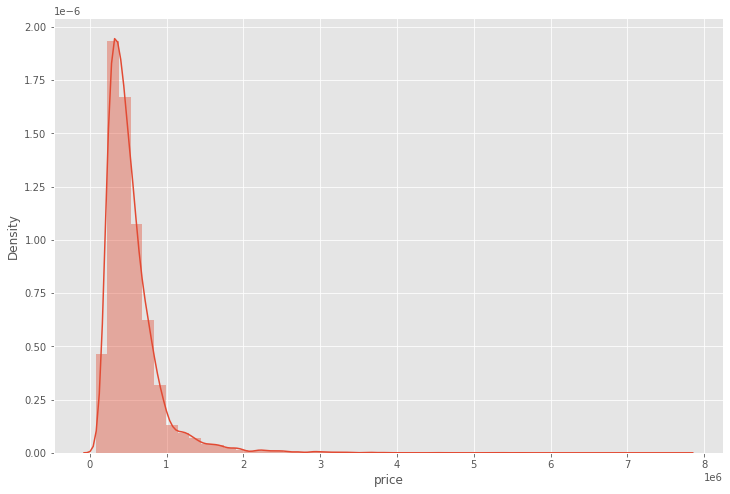

In [42]:
#ヒストグラムによる可視化
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

In [43]:
df['price'] = np.log1p(df['price'])
df['price'].head()

0    12.309987
1    13.195616
2    12.100718
3    13.311331
4    13.142168
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


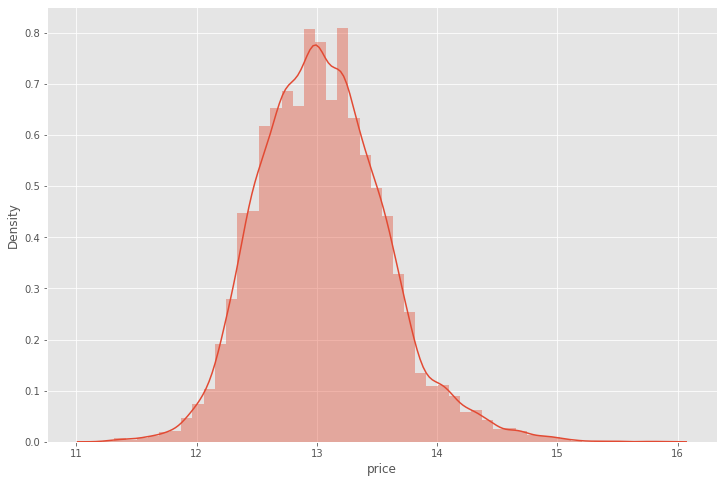

In [44]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

In [46]:
from sklearn.preprocessing import  StandardScaler, MinMaxScaler

In [48]:
for col in df.columns:
  scaler = StandardScaler()
  df[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1,1))
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,-1.400936,-0.398737,-1.447464,-0.979835,-0.228321
1,0.280624,-0.398737,0.175607,0.533634,-0.189885
2,-1.798279,-1.473959,-1.447464,-1.426254,-0.123298
3,0.500335,0.676485,1.149449,-0.130550,-0.244014
4,0.179141,-0.398737,-0.149007,-0.435422,-0.169653
